In [1]:
from __future__ import annotations

import ast
import typing as T
import collections.abc as C
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from sklearn.preprocessing import StandardScaler

In [2]:
def load_dataset(filepath: str) -> pd.DataFrame:
    def parse_values(x: pd.Series) -> pd.Series:
        keys = ast.literal_eval(x.loc["keys"])[0]
        values = (
            float(x) if x != "null" else pd.NA
            for x in ast.literal_eval(x.loc["values"])[0]
        )
        return pd.Series(dict(zip(keys, values)))

    df = pd.read_csv(filepath, parse_dates=[2], index_col=0)
    values = df.apply(parse_values, axis=1)
    df = pd.concat([df[["configuration_item_id", "ts"]], values], axis=1)
    return df.convert_dtypes()

In [3]:
X_train = load_dataset("data/train999.csv")
station_1 = next(st for _, st in X_train.groupby("configuration_item_id"))

<Axes: xlabel='ts'>

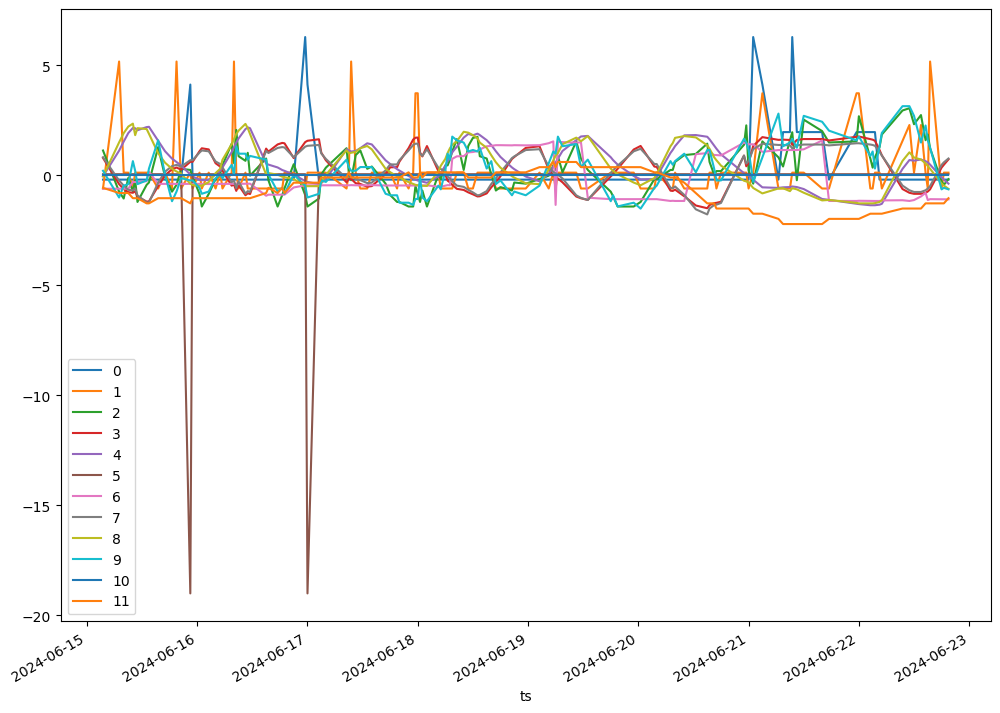

In [14]:
meteo_cols = [col for col in station_1.columns if col.startswith("meteo")]
meteo_dated = station_1[["ts", *meteo_cols]].set_index("ts").sort_index()

pd.DataFrame(
    StandardScaler().fit_transform(meteo_dated),
    index=meteo_dated.index,
).loc[
    "2024-06-15":"2024-06-22"
].plot(figsize=(12, 9))